# USAID Sites and Geospatial Intelligence
This notebook covers the creating of geospatial data

In [6]:
import os

import pandas as pd
import numpy as np

In [7]:
#os.mkdir("geospatial_data")

FileExistsError: [Errno 17] File exists: 'geospatial_data'

In [9]:
%matplotlib inline

In [10]:
# Load the site data provided by USAID
site_data = pd.read_csv("final_data/service_delivery_site_data.csv")
site_data.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [12]:
import geopandas as gpd

In [13]:
# Use the data provided by UN Geospatial Repsitory
gdf = gpd.read_file('civ_admbnda_adm3_cntig_ocha_itos_20180706/civ_admbnda_adm3_cntig_ocha_itos_20180706.shp')

gdf.head()

,Shape_Leng,Shape_Area,ADM3_FR,ADM3_PCODE,ADM3_REF,ADM3ALT1FR,ADM3ALT2FR,ADM2_FR,ADM2_PCODE,ADM1_FR,ADM1_PCODE,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,1.193760,0.061911,Abengourou,CI200101,None,None,None,Abengourou,CI2001,Indenie-Djuablin,CI20,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-3.70082 6.77977, -3.69775 6.77833, ..."
1,1.045872,0.045117,Abidjan,CI010101,None,None,None,Abidjan,CI0101,District Autonome D'Abidjan,CI01,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-3.96967 5.46470, -3.96803 5.46311, ..."
2,1.097566,0.042344,Abigui,CI270201,None,None,None,Dimbokro,CI2702,N'Zi,CI27,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-4.84054 6.86701, -4.81972 6.88024, ..."
3,1.360062,0.052789,Aboisso,CI300101,None,None,None,Aboisso,CI3001,Sud-Comoe,CI30,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-3.31306 5.63700, -3.31242 5.63626, ..."
4,0.712925,0.018852,Aboisso-Comoé,CI240301,Aboisso-Comoe,None,None,Alépé,CI2403,Me,CI24,Côte d'Ivoire,CI,2011-12-24,2018-07-06,None,"POLYGON ((-3.42471 5.74856, -3.42353 5.74838, ..."


###  Lets start trying to find a shared column to match on

In [15]:
districts = site_data['site_district'].unique()
print(len(districts))
districts.sort()
districts

81


array(['ABENGOUROU', 'ABOBO-EST', 'ABOISSO', 'ADIAKE',
       'ADJAME-PLATEAU-ATTECOUBE', 'ADZOPE', 'AGBOVILLE', 'AGNIBILEKROU',
       'AKOUPE', 'ALEPE', 'ANYAMA', 'BANGOLO', 'BEOUMI', 'BETTIE',
       'BIANKOUMA', 'BLOLEQUIN', 'BOCANDA', 'BONDOUKOU', 'BONGOUANOU',
       'BOUAFLE', 'BOUAKE NORD-OUEST', 'BOUNA', 'BOUNDIALI',
       'COCODY-BINGERVILLE', 'DABAKALA', 'DABOU', 'DALOA', 'DANANE',
       'DAOUKRO', 'DIDIEVI', 'DIMBOKRO', 'DIVO', 'DUEKOUE',
       'FERKESSEDOUGOU', 'FRESCO', 'GAGNOA', 'GRAND-BASSAM',
       'GRAND-LAHOU', 'GUEYO', 'GUIGLO', 'GUITRY', 'ISSIA', 'JACQUEVILLE',
       'KATIOLA', 'KORHOGO', 'KORO', 'KOUIBLY',
       'KOUMASSI-PORT BOUET-VRIDI', 'LAKOTA', "M'BAHIAKRO", 'MAN',
       'MANKONO', 'MINIGNAN', 'NASSIAN', 'NIAKARAMADOUGOU', 'ODIENNE',
       'OUANGOLO', 'OUME', 'PRIKRO', 'SAKASSOU', 'SAN PEDRO', 'SASSANDRA',
       'SEGUELA', 'SIKENSI', 'SINFRA', 'SOUBRE', 'TABOU', 'TANDA',
       'TENGRELA', 'TIASSALE', 'TIEBISSOU', 'TOUBA', 'TOULEPLEU',
       'TOUMO

In [16]:
site_data.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


'ABOBO-EST' is a neighborhood in Abidjan

Match city to district then aggregate the district level.

Need to do some manual analysis to figure this whole matching up.

#### Data Processing
- Observe there is a missing I so you think perhaps the two will match on ADM2_PCODE but this is a mistake. **There is no relationship between the two**

```
#site_data['site_code'].head()

#gdf['ADM2_PCODE'].head()

# Insert String
#ins_char = lambda x: x[0:1]+"I"+x[1:]
#site_data['ADM2_PCODE'] = site_data['site_code'].apply(ins_char)
```

## Data Processing

### The codes are not matching up between the two dataframes
- On inspection we can see there is an I missing, lets try tp add that and see if that fixes thing

In [17]:
print("Num sites: ", len(site_data))

print("Num boundary shapes at ADM3: ",len(gdf))

Num sites:  156
Num boundary shapes at ADM3:  510


## Geospatial Data



### Regional Data

-  Wikipedia data
- Data from UN Geospatial Data Repository

#### Notes
https://en.wikipedia.org/wiki/Subdivisions_of_Ivory_Coast
https://www.youtube.com/watch?v=6pYorKr3XFQ&ab_channel=AlJazeeraEnglish
https://www.youtube.com/watch?v=O1_wpzPX7C8&ab_channel=FRANCE24English
https://fr.wikipedia.org/wiki/R%C3%A9gions_de_C%C3%B4te_d%27Ivoire

In [18]:
from io import StringIO

# Taken from this Wikipedia Page
# https://fr.wikipedia.org/wiki/R%C3%A9gions_de_C%C3%B4te_d%27Ivoire


wikipedia_table = """
District	Chef-lieu de district	Région	Chef-lieu de région
Zanzan	Bondoukou	Bounkani	Bouna
Zanzan	Bondoukou	Gontougo	Bondoukou
Yamoussoukro (district autonome)	—	—	—
Woroba	Séguéla	Béré	Mankono
Woroba	Séguéla	Bafing	Touba
Woroba	Séguéla	Worodougou	Séguéla
Vallée du Bandama	Bouaké	Hambol	Katiola
Vallée du Bandama	Bouaké	Gbêkê	Bouaké
Savanes	Korhogo	Poro	Korhogo
Savanes	Korhogo	Tchologo	Ferkessédougou
Savanes	Korhogo	Bagoué	Boundiali
Sassandra-Marahoué	Daloa	Haut-Sassandra	Daloa
Sassandra-Marahoué	Daloa	Marahoué	Bouaflé
Montagnes	Man	Tonkpi	Man
Montagnes	Man	Cavally	Guiglo
Montagnes	Man	Guémon	Duékoué
Lagunes	Dabou	Agnéby-Tiassa	Agboville
Lagunes	Dabou	Mé	Adzopé
Lagunes	Dabou	Grands Ponts	Dabou
Lacs	Dimbokro	N’Zi	Dimbokro
Lacs	Dimbokro	Iffou	Daoukro
Lacs	Dimbokro	Bélier	Toumodi
Lacs	Dimbokro	Moronou	Bongouanou
Gôh-Djiboua	Gagnoa	Gôh	Gagnoa
Gôh-Djiboua	Gagnoa	Lôh-Djiboua	Divo
Denguélé	Odienné	Folon	Minignan
Denguélé	Odienné	Kabadougou	Odienné
Comoé	Abengourou	Indénié-Djuablin	Abengourou
Comoé	Abengourou	Sud-Comoé	Aboisso
Bas-Sassandra	San-Pédro	Nawa	Soubré
Bas-Sassandra	San-Pédro	San-Pédro	San-Pédro
Bas-Sassandra	San-Pédro	Gbôklé	Sassandra
Abidjan (district autonome)	—	—	—"""

wiki_region_mappings = pd.read_csv(StringIO(wikipedia_table),sep="\t")


In [20]:
gdf.groupby(['ADM1_FR','ADM2_FR']).size().sort_values(ascending =False)

ADM1_FR                            ADM2_FR     
Poro                               Korhogo         16
Goh                                Gagnoa          12
Gontougo                           Bondoukou       12
Agneby-Tiassa                      Agboville       11
Tonkpi                             Man             11
                                                   ..
Indenie-Djuablin                   Béttié           2
District Autonome De Yamoussoukro  Yamoussoukro     2
                                   Attiégouakro     2
Cavally                            Taï              2
Grands Ponts                       Jacqueville      2
Length: 108, dtype: int64

#### Site Data  

In [21]:
site_data.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [22]:
site_data.groupby(['site_region','site_district'])['site_code'].size().sort_values(ascending=False).head(10)

site_region             site_district            
ABIDJAN 1-GRANDS PONTS  ADJAME-PLATEAU-ATTECOUBE     9
ABIDJAN 2               KOUMASSI-PORT BOUET-VRIDI    9
                        COCODY-BINGERVILLE           8
ABIDJAN 1-GRANDS PONTS  YOPOUGON-OUEST-SONGON        6
ABIDJAN 2               ABOBO-EST                    6
PORO-TCHOLOGO-BAGOUE    KORHOGO                      5
ABIDJAN 1-GRANDS PONTS  YOPOUGON-EST                 4
GOH                     GAGNOA                       4
GBOKLE-NAWA-SAN PEDRO   SOUBRE                       4
AGNEBY-TIASSA-ME        TIASSALE                     4
Name: site_code, dtype: int64

#### Analysis of Site Data Boundary Structure
- Data is organized by Region and then by Site, this is contrary to the way that Cote d'Ivoire organizes itself which is by: 
    1. District
    2. Region
    3. Department
    4. Village
    5. Commune
    
- The USAID dataset seems to be presented as
    1. Region: regions or multiple regions combined under one administrative boundary
    2. District: regions and departments

### Fuzz-Matching of regional names in the dataset

- Calculate the character lexical similarity in the strings to determine the best matches.

In [55]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


def get_fuzzy_match_results(ref_array,custom_array):
    # Create a dictionary to hold all the string matching calculations
    custom_mapping = {}
    
    # Lambda functions to extract the match name from the tuple
    get_match_name = lambda x: match_dict[x][0]
    
    # Lambda functions to extract the match score from the tuple
    get_match_score = lambda x: match_dict[x][1]
    
    # Create_Reference_table
    reference_table = pd.DataFrame({'ref':ref_array})
    # Iterate over every commune name in the reference table
    for custom_label in custom_array:
        # Skip values if not string
        if type(custom_label) == str:

            ffuzzy_match = lambda x : fuzz.partial_ratio(custom_label,x) 
            reference_table[custom_label] = reference_table['ref'].apply(ffuzzy_match)
            
            #reference_table[custom_label] = fuzzy_ratios
            ref_max_value = reference_table[custom_label].max()
            # Identify the record that has the highest score with the provided custom_label
            matching_recs = reference_table.loc[reference_table[custom_label]==ref_max_value]

            # If there are two communes that have an equal score, select the first value
            if len(matching_recs)>1:
                #print("Multiple matches: ",custom_label)
                match_site_name = matching_recs['ref'].values[0]
            else:
                match_site_name = matching_recs['ref'].values[0]

            # Update the match_dict with a tuple to store the final string and its corresponding score
            custom_mapping[custom_label] = {'est_site_name':match_site_name,'fratio':ref_max_value}
        else:
            custom_mapping[custom_label] = None
        
        mapping_df = pd.DataFrame(custom_mapping).transpose()
        ref_df = pd.DataFrame(reference_table).set_index('ref')
    return mapping_df,ref_df


### Create a series of vectors to perform fuzzy wuzzy matching to create mappings

In [24]:
import seaborn as sns; sns.set()

In [26]:
## USAID

# Isolate USAID Region values
usaid_civ_site_region = site_data['site_region'].str.upper().unique()
#print(len(usaid_civ_site_region))
#print(usaid_civ_site_region)

# Isolate USAID District values
usaid_civ_site_district = site_data['site_district'].str.upper().unique()
#print(len(usaid_civ_site_district))
#print(usaid_civ_site_district)


## Wikipedia

# Isolate Wikipedia Region labels
wiki_admn_region = wiki_region_mappings['Région'].str.upper().unique()
#print(len(wiki_admn_region))
#print(wiki_admn_region)

# Isolate Wikipedia Department labels
wiki_admn_dept = wiki_region_mappings['Chef-lieu de région'].str.upper().unique()
print(len(wiki_admn_dept))
#print(wiki_admn_dept)


## UN Geospatial

# Isolate UN ADM1_FR labels
geospatial_admn_1 = gdf['ADM1_FR'].str.upper().unique()
#print(len(geospatial_admn_1))
#print(geospatial_admn_1)

# Isolate UN ADM3_FR labels
geospatial_admn_2 = gdf['ADM2_FR'].str.upper().unique()
print(len(geospatial_admn_2))
#print(geospatial_admn_2)

# Isolate UN ADM4_FR labels
geospatial_admn_3 = gdf['ADM3_FR'].str.upper().unique()
print(len(geospatial_admn_3))
#print(geospatial_admn_3)

32
108
506


In [38]:
import matplotlib.pyplot as plt

In [66]:
def make_fuzzy_matching_evaluation(ref,labels,ref_name='x',label_name='y'):
    mapping ,ref_table = get_fuzzy_match_results(ref,labels)
    
    mapping['fratio'] = pd.to_numeric(mapping['fratio'])
    
    plt.subplots(figsize=(8,6))
    sns.heatmap(ref_table_1)
    plt.title(f"{ref_name} - {len(ref)} vs {label_name} - {len(labels)}",fontdict={'fontsize':20})
    plt.show()
    print(mapping.fratio.describe())
    return mapping ,ref_table

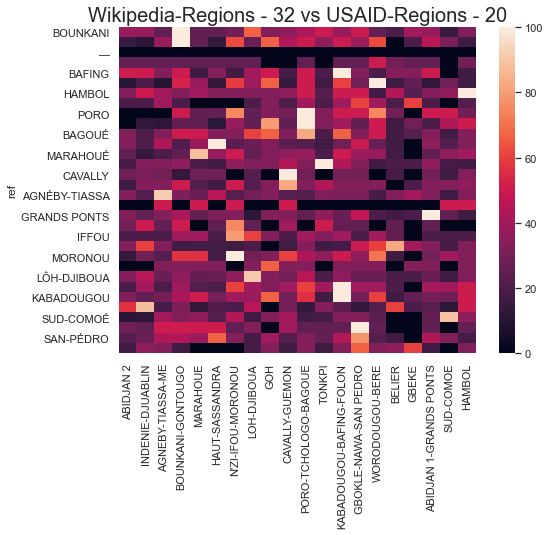

count     20.000000
mean      91.400000
std       13.003643
min       57.000000
25%       88.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: fratio, dtype: float64


In [67]:
wu_reg_reg_map, wu_reg_reg_tbl = make_fuzzy_matching_evaluation(wiki_admn_region,usaid_civ_site_region,'Wikipedia-Regions','USAID-Regions')

#### Wikipedia: Spatial-Regions vs USAID-Regions
- First we capitalize the results and there started to be several more higher fuzzy ratio scores calculated.  Initially there were very weak results 'Me' was the highest match for all of the initial values.


*Lets try Wikipedia Regions vs USAID - districts....*


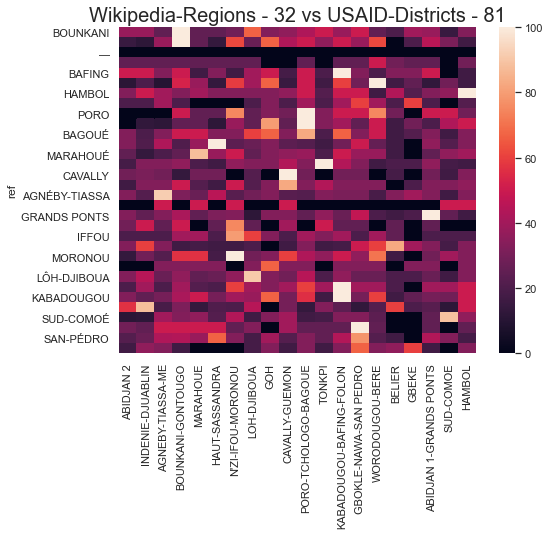

count     81.000000
mean      59.703704
std       11.994212
min       40.000000
25%       50.000000
50%       57.000000
75%       67.000000
max      100.000000
Name: fratio, dtype: float64


In [68]:

wu_reg_dis_map, wu_reg_dis_tbl = make_fuzzy_matching_evaluation(
    wiki_admn_region,
    usaid_civ_site_district,'Wikipedia-Regions','USAID-Districts')

#### Results: Wikipedia-Regions vs USAID-Regions
- Great results startings to see many  matches over 80


*Lets try Wikipedia-departments_ with USAID-regions*

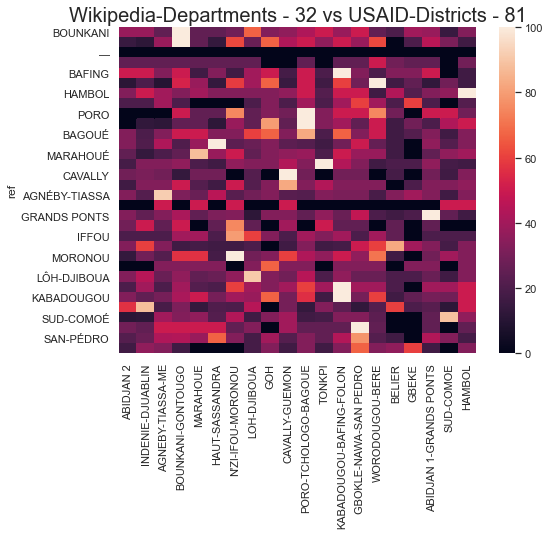

count     81.000000
mean      75.518519
std       18.097729
min       33.000000
25%       60.000000
50%       71.000000
75%      100.000000
max      100.000000
Name: fratio, dtype: float64


In [70]:

wu_dep_dis_map, wu_dep_dis_tbl = make_fuzzy_matching_evaluation(
    wiki_admn_dept,
    usaid_civ_site_district,'Wikipedia-Departments','USAID-Districts')

## Matching with the geospatial data and making custom maps

####  ADM1_FR

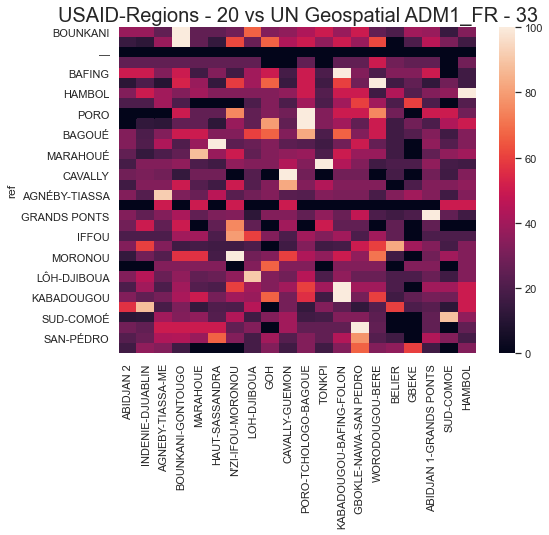

count     33.000000
mean      97.515152
std        9.421124
min       50.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: fratio, dtype: float64


In [81]:
# Compare ADM1_FR and USAID's Region Codes 

ug_reg_dis_map, ug_reg_dis_tbl = make_fuzzy_matching_evaluation(
    usaid_civ_site_region,
    geospatial_admn_1,'USAID-Regions','UN Geospatial ADM1_FR')

In [80]:
# Using the matches from fuzzy model as a base with ADM1_FR and USAID Region
# Region vs Region

# This will drop one region from the reference index
# Drop Yamaoussoukora
civ_strong_matches = ug_reg_dis_map[ug_reg_dis_map.fratio>50]
print(len(civ_strong_matches))
print(civ_strong_matches)


civ_region_adm1_mapping = {index:data['est_site_name'] for index, data in civ_strong_matches.iterrows()}

32
                                       est_site_name  fratio
INDENIE-DJUABLIN                    INDENIE-DJUABLIN     100
DISTRICT AUTONOME D'ABIDJAN                ABIDJAN 2      88
N'ZI                               N'ZI-IFOU-MORONOU     100
SUD-COMOE                                  SUD-COMOE     100
ME                                  AGNEBY-TIASSA-ME     100
AGNEBY-TIASSA                       AGNEBY-TIASSA-ME     100
GRANDS PONTS                  ABIDJAN 1-GRANDS PONTS     100
IFFOU                              N'ZI-IFOU-MORONOU      80
GONTOUGO                           BOUNKANI-GONTOUGO     100
MORONOU                            N'ZI-IFOU-MORONOU     100
GBEKE                                          GBEKE     100
BELIER                                        BELIER     100
HAMBOL                                        HAMBOL     100
GUEMON                                CAVALLY-GUEMON     100
PORO                            PORO-TCHOLOGO-BAGOUE     100
KABADOUGOU           

### Lets compare ADM2_Fr and USAID District

In the past example we used 50 as our cut-off criteria now as we have stronger matches we will increase it to 75

####  ADM2_FR

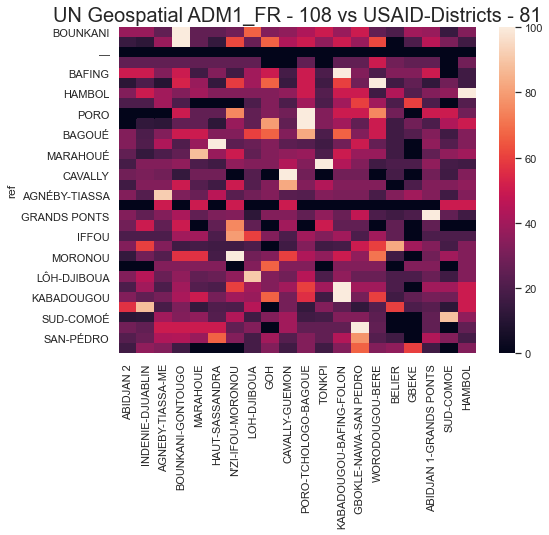

count     81.000000
mean      92.654321
std       11.184990
min       60.000000
25%       86.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: fratio, dtype: float64
Strong matches
81
             est_site_name  fratio
BONGOUANOU      BONGOUANOU     100
TABOU                TABOU     100
ABENGOUROU      ABENGOUROU     100
BIANKOUMA        BIANKOUMA     100
BOCANDA            BOCANDA     100
GRAND-BASSAM  GRAND-BASSAM     100
BOUNA                BOUNA     100
DABAKALA          DABAKALA     100
DABOU                DABOU     100
MINIGNAN          MINIGNAN     100
Weak matches
6
                         est_site_name  fratio
COCODY-BINGERVILLE           AGBOVILLE      67
ABOBO-EST                        BOTRO      60
ADJAME-PLATEAU-ATTECOUBE        LAKOTA      67
YOPOUGON-EST                     KOUTO      60
TREICHVILLE-MARCORY                MAN      67
BETTIE                          BÉTTIÉ      67


In [82]:
# Compare ADM1_FR and USAID's Region Codes 

gu_dep_dis_map, gu_dep_dis_tbl = make_fuzzy_matching_evaluation(
    geospatial_admn_2,
    usaid_civ_site_district,'UN Geospatial ADM1_FR','USAID-Districts')


strong_matches = gu_dep_dis_map[gu_dep_dis_map.fratio>50]
print("Strong matches")
print(len(strong_matches))
print(strong_matches.sort_values(by='fratio',ascending=False).head(10))
weak_matches = gu_dep_dis_map[gu_dep_dis_map.fratio<70]

print("Weak matches")
print(len(weak_matches))
print(weak_matches)

# Drop values with a bad mapping
# Using the weak matches we can identify the worst performing matches
# We want to keep the last records though, it seems the accent is being interpretted poorly
drop_indices = weak_matches.index[:-1]


civ_dist_adm2_mapping = {index:data['est_site_name'] for index, data in gu_dep_dis_map.drop(drop_indices).iterrows()}

####  ADM3_FR
#### Lets compare ADM3_Fr and USAID District

I have already pruned the matches by evaluating weak matches.

506
81


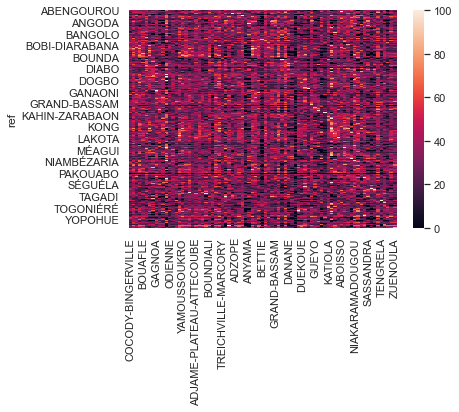

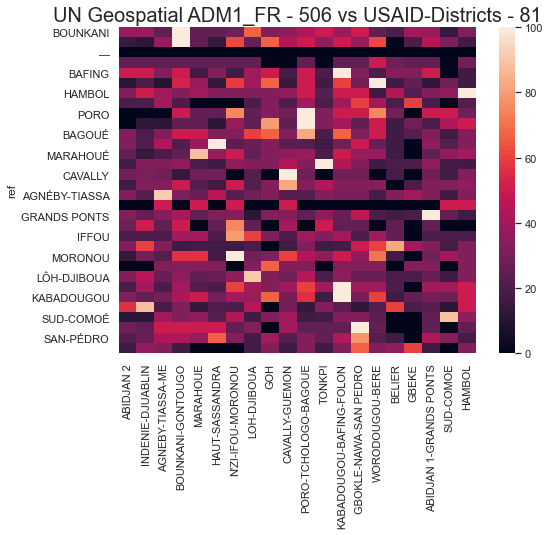

count     81.000000
mean      94.543210
std        8.704955
min       67.000000
25%       88.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: fratio, dtype: float64
Strong matches
81
                   est_site_name  fratio
COCODY-BINGERVILLE   BINGERVILLE     100
TANDA                      TANDA     100
ADIAKE                    ADIAKE     100
NASSIAN                  NASSIAN     100
M'BAHIAKRO            M'BAHIAKRO     100
AGNIBILEKROU        AGNIBILEKROU     100
MANKONO                      MAN     100
ANYAMA                    ANYAMA     100
BONGOUANOU                 BONGO     100
BANGOLO                  BANGOLO     100
Weak matches
1
                    est_site_name  fratio
TREICHVILLE-MARCORY           MAN      67


In [83]:
geospatial_admn_3 = gdf['ADM3_FR'].str.upper().unique()
print(len(geospatial_admn_3))
#print(civ_admn_dept)

print(len(usaid_civ_site_district))
site_dist_geo_admn3_res,site_dist_geo_admn3_tbl = get_fuzzy_match(geospatial_admn_3,usaid_civ_site_district)
sns.heatmap(site_dist_geo_admn3_tbl.set_index('ref'))


# Compare ADM1_FR and USAID's Region Codes 

gu_dep3_dis_map, gu_dep3_dis_tbl = make_fuzzy_matching_evaluation(
    geospatial_admn_3,
    usaid_civ_site_district,'UN Geospatial ADM1_FR','USAID-Districts')


strong_matches = gu_dep3_dis_map[gu_dep3_dis_map.fratio>50]
print("Strong matches")
print(len(strong_matches))
print(strong_matches.sort_values(by='fratio',ascending=False).head(10))
weak_matches = gu_dep3_dis_map[gu_dep3_dis_map.fratio<70]

print("Weak matches")
print(len(weak_matches))
print(weak_matches)

# Drop values with a bad mapping
# Using the weak matches we can identify the worst performing matches
drop_indices = weak_matches.index[:-1]


civ_dist_adm3_mapping = {index:data['est_site_name'] for index, data in gu_dep3_dis_map.drop(drop_indices).iterrows()}


#### Lets Apply the mappings

- Starting from region, create a mapping to map each value in the USAID data set with our pruned mappings

In [84]:
site_data['adm3_fr'] = site_data['site_district'].map(civ_dist_adm3_mapping)
site_data['adm2_fr'] = site_data['site_district'].map(civ_dist_adm2_mapping)

##### Apply the mappings to the geospatial data
- Because of how the USAID regions incorporated multiple existing geospatial boundaries, I applied the USAID regional mapping onto the existing ADM1_FR names in order to gain access to map projections with those groupings.

In [ ]:
gdf['usaid_admin_region'] = gdf['ADM1_FR'].str.upper().map(civ_region_adm1_mapping)

gdf.to_file("geospatial_data/Custom_CIV.shp")
gdf['usaid_admin_region'].head()